**Predictive models for condominium prices across major cities in South Korea**

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

file_path = '/content/drive/MyDrive/Data/HousingPriceBusanGwangju.csv'
df = pd.read_csv(file_path)

In [64]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87136 entries, 0 to 87135
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date of transaction                          87136 non-null  int64  
 1   Longitude                                    87136 non-null  float64
 2   Latitude                                     87136 non-null  float64
 3   Crow-fly distance to nearest subway station  87136 non-null  float64
 4   Size of unit                                 87136 non-null  float64
 5   Condominium price                            87136 non-null  int64  
 6   Floor                                        87136 non-null  int64  
 7   Construction year                            87136 non-null  int64  
 8   Network distance to nearest subway station   87136 non-null  float64
 9   Number of households                         87136 non-null  int64  
 10

In [65]:
print("Missing Values:\n", df.isna().sum())

Missing Values:
 Date of transaction                            0
Longitude                                      0
Latitude                                       0
Crow-fly distance to nearest subway station    0
Size of unit                                   0
Condominium price                              0
Floor                                          0
Construction year                              0
Network distance to nearest subway station     0
Number of households                           0
Number of condominium buildings                0
Highest floor                                  0
Parking space per household                    0
Heating type                                   0
Number of top university entrants              0
Number of high schools                         0
Network distance to the CBD                    0
Network distance to nearest greenspace         0
Network distance to nearest waterfront         0
Number of bus stops                            0
Pop

# Part1 : Linear Regression

Please use only HousingPriceBusanGwangju.csv in this part. HousingPriceBusanGwangju.csv includes data from two cities: Busan and Gwangju. Please do not preprocess the data in this part.

Your interpretation for any non-intercept coefficients should follow the interpretation shown in the class. Please point out the baseline group and the focal group when applicable.

For questions 1 to 3, use only the data from Busan city.

## Q1.

Please regress Condominium price against Size of unit, Floor, Construction year, Number of households, Parking space per household, Heating type, Number of bus stops, Network distance to the CBD, Number of top university entrants, Network distance to nearest greenspace, Network distance to nearest waterfront, Population density, and Ratio of adults with higher degrees. Interpret the significant coefficients and discuss what these variables reveal about the main factors affecting condominium prices in Busan.

In [66]:
# Filter rows where City is 'Busan'
df_busan = df[df['City'] == 'Busan']

# Define X and y using the filtered dataframe
X = df_busan[['Size of unit', 'Floor', 'Construction year', 'Number of households',
              'Parking space per household', 'Heating type', 'Number of bus stops',
              'Network distance to the CBD', 'Number of top university entrants',
              'Network distance to nearest greenspace', 'Network distance to nearest waterfront',
              'Population density', 'Ratio of adults with higher degrees']]
y = df_busan['Condominium price']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Condominium price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:44:58   Log-Likelihood:            -6.3236e+05
No. Observations:               61152   AIC:                         1.265e+06
Df Residuals:                   61138   BIC:                         1.265e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

**1. Coefficients**
- **Size of Unit (258.33)**: Larger units are valued higher, with prices increasing by approximately 258.33 per additional square meter. Unit size is a primary factor in determining condominium prices.
- **Floor (306.23)**: Higher floors command higher prices, with each additional floor increasing the price by around 306.23. Buyers likely prefer higher floors for views or status.
- **Construction Year (184.42)**: Newer buildings are valued higher, with prices increasing by approximately 184.42 per additional year in construction recency. Buyers tend to value newer properties.
- **Number of Households (1.28)**: Prices slightly increase by 1.28 for each additional household in the complex, suggesting that larger complexes might be seen as more desirable.
- **Parking Space per Household (5191.05)**: Each additional parking space per household significantly raises prices by about 5191.05, highlighting the importance of parking availability.
- **Heating Type (797.74)**: Properties with certain heating types increase prices by around 797.74, indicating a preference for specific heating systems.
- **Number of Bus Stops (-38.15)**: More nearby bus stops slightly reduce prices by 38.15 per stop, possibly due to perceived congestion or noise.
- **Network Distance to CBD (-0.34)**: Proximity to the Central Business District (CBD) positively affects prices, with each unit increase in distance reducing the price by 0.34, reflecting the value of central location.
- **Number of Top University Entrants (-167.98)**: Higher numbers of nearby top university entrants slightly decrease prices, possibly due to school-related congestion.
- **Network Distance to Nearest Greenspace (0.84)**: Increased distance to greenspace slightly raises prices, implying that immediate proximity to parks may not be a primary price driver.
- **Network Distance to Nearest Waterfront (-1.41)**: Proximity to waterfront areas increases prices, with each unit closer adding 1.41 to the price, indicating a premium on waterfront access.
- **Population Density (-0.01)**: Higher population density slightly lowers prices by 0.01 per unit, suggesting lower desirability in highly dense areas.
- **Ratio of Adults with Higher Degrees (254.70)**: A higher proportion of educated adults in the area correlates with higher prices, increasing by about 254.70 for each percentage increase, highlighting the desirability of educated neighborhoods.

**2. Implications for Condominium Price**
- Key factors driving condominium prices in Busan include unit size, floor level, construction year, parking availability, and proximity to the CBD and waterfront. Additionally, neighborhood characteristics, such as educational level and population density, as well as specific amenities like heating type and greenspace, also play a role in price determination. These findings reveal that buyers value **space, newer buildings, convenience features, and central or scenic locations.**

## Q2.

Add Network distance to nearest subway station to the regression model in Q1. How does proximity to the subway system impact housing prices? Conduct a test to determine whether this variable should be added to the regression model, and explain your findings.

In [67]:
# Add the new variable 'Network distance to nearest subway station' to X
X['Network distance to nearest subway station'] = df_busan['Network distance to nearest subway station']

# Fit the regression model again with the updated X
model = sm.OLS(y, X).fit()

# Print the summary of the updated model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Condominium price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:45:06   Log-Likelihood:            -6.3185e+05
No. Observations:               61152   AIC:                         1.264e+06
Df Residuals:                   61137   BIC:                         1.264e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [68]:
# Conduct a test to determine whether this variable
# Base model (Exclude 'Network distance to nearest subway station')
X_base = X.drop(columns=['Network distance to nearest subway station'])
model_1 = sm.OLS(y, X_base).fit()

# New model (Include 'Network distance to nearest subway station')
model_2 = sm.OLS(y, X).fit()

# Comparison two models with F-test
f_test_result = model_1.compare_f_test(model_2)
print(f"F-statistic: {f_test_result[0]}, p-value: {f_test_result[1]}")

# Comparison between AIC and BIC
print("Base Model AIC:", model_1.aic, "BIC:", model_1.bic)
print("New Model AIC:", model_2.aic, "BIC:", model_2.bic)

# Compare R Square values
r2_model_1 = model_1.rsquared
r2_model_2 = model_2.rsquared

print("Base Model R-squared:", r2_model_1)
print("New Model R-squared:", r2_model_2)

if r2_model_2 > r2_model_1:
    print("Adding 'Network distance to nearest subway station' improves model fit.")
else:
    print("Adding 'Network distance to nearest subway station' does not improve model fit.")


# Calculate VIF to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

F-statistic: 1007.5922822000722, p-value: nan
Base Model AIC: 1264738.535707589 BIC: 1264864.8313574477
New Model AIC: 1263724.3155333642 BIC: 1263859.6323010698
Base Model R-squared: 0.747544637383726
New Model R-squared: 0.7517052588461909
Adding 'Network distance to nearest subway station' improves model fit.
                                       feature           VIF
0                                        const  67273.938909
1                                 Size of unit      1.438663
2                                        Floor      1.204129
3                            Construction year      1.490519
4                         Number of households      1.232577
5                  Parking space per household      2.007875
6                                 Heating type      1.370889
7                          Number of bus stops      1.229663
8                  Network distance to the CBD      2.455046
9            Number of top university entrants      1.069825
10      Network

**How does proximity to the subway system impact housing prices?**

Proximity to the subway system has a significant positive impact on housing prices. The coefficient for `Network distance to nearest subway station` is -0.4560, meaning that for each unit increase in distance from the nearest subway station, condominium prices decreases by approximately 0.456. This negative relationship indicates that closer proximity to subway access raises housing prices, as buyers likely value the convenience and accessibility provided by nearby public transit.

The substantial t-value (-32.007) and low p-value (<0.001) further support the statistical significance of this variable, confirming that proximity to the subway system is a key factor in determining housing prices.

**Implication and Findings**

**1. F-statistic and p-value**
- **F-test Result**: The F-statistic value is 1007.59, which is very high, but the p-value is NaN, making it challenging to determine if the difference between the two models is statistically significant based solely on the F-test. This NaN value could result from specific data characteristics, insufficient degrees of freedom, or the high VIF for the constant term. However, we can still assess the impact of the additional variable through other indicators.

**2. AIC and BIC Comparison**
- **Base Model AIC: 1,264,738.54 > New Model AIC: 1,263,724.32**
- **Base Model BIC: 1,264,864.83 > New Model BIC: 1,263,859.63**
- AIC and BIC are model fit indicators; lower values indicate better fit and reduced risk of overfitting. Since the AIC and BIC values for the New Model (with the Network distance to nearest subway station variable added) are lower than those of the Base Model, we can infer that adding this variable improves the model’s explanatory power while mitigating overfitting. A decrease of around 1,000 in AIC and BIC suggests a meaningful difference between the two models.

**3. R-squared Comparison**
- **Base Model R-squared: 0.7475 < New Model R-squared: 0.7517**
- The R-squared value increased by approximately 0.4%, indicating that adding Network distance to nearest subway station allows the model to explain a slightly greater amount of variance in condominium prices. This suggests that the model now better fits the data.

**4. VIF (Variance Inflation Factor) Analysis**
- Most VIF values are between 1 and 2, indicating no significant multicollinearity issues. The VIF for the Network distance to nearest subway station variable is 2.03, suggesting that it does not introduce multicollinearity concerns. The high VIF for the constant term is likely due to data characteristics and does not substantially affect the analysis.

**Conclusion**

	1.	Model Performance Improvement: The improvements in AIC, BIC, and R-squared values indicate that adding Network distance to nearest subway station enhances the model’s performance.
	2.	No Multicollinearity Issues: VIF analysis shows no multicollinearity concerns, with the added variable maintaining significant independence from other variables.
	3.	F-test Limitation: Although the F-test p-value is NaN, the reductions in AIC, BIC, and the increase in R-squared suggest that the new variable improves model fit.

Therefore, we conclude that including the Network distance to nearest subway station variable provides a meaningful improvement in predicting condominium prices.Adding `Network distance to nearest subway station` increases the R-squared from 0.7475 in model_base to 0.7517 in model_new, indicating a very modest improvement in model fit. This suggests `Network distance to nearest subway station` has a small impact on condominium price but doesn’t substantially improve the model’s explanatory power.

## Q3.

Create some new variables using Date of transaction, Construction year, or both to improve the regression model. Provide your rationale for these new variables, add them to the regression model in Q2, and interpret the coefficients of the newly added variables. What insights do these new variables offer?

In [69]:
# Correct the 'Date of transaction' format to calculate the years
df_busan['Date of transaction'] = pd.to_datetime(df_busan['Date of transaction'])

# Create the new variables 'Building Age' and 'TransConsyr'
df_busan['Building Age'] = df_busan['Date of transaction'].dt.year - df_busan['Construction year']
df_busan['TransConsyr'] = df_busan['Date of transaction'].dt.year * df_busan['Construction year']
df_busan['ConsyrSize'] = df_busan['Size of unit'] * df_busan['Construction year']

# Add 'Building Age' and 'TransConsyr' columns to X individually
X['Building Age'] = df_busan['Building Age']
X['TransConsyr'] = df_busan['TransConsyr']
X['ConsyrSize'] = df_busan['ConsyrSize']

# Fit the regression model again with the updated X
model_3 = sm.OLS(y, X).fit()

# Print the summary of the updated model
print(model_3.summary())

<ipython-input-69-6005583b3a00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busan['Date of transaction'] = pd.to_datetime(df_busan['Date of transaction'])
<ipython-input-69-6005583b3a00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busan['Building Age'] = df_busan['Date of transaction'].dt.year - df_busan['Construction year']
<ipython-input-69-6005583b3a00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

                            OLS Regression Results                            
Dep. Variable:      Condominium price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.402e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:45:18   Log-Likelihood:            -6.2887e+05
No. Observations:               61152   AIC:                         1.258e+06
Df Residuals:                   61136   BIC:                         1.258e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

**New Variables**
> In the updated model, I introduced three new variables—Building Age, TransConsyr, and ConsyrSize—based on the assumption that the building’s age and the interaction between construction year and unit size could offer additional insights into factors influencing condominium prices. These variables were designed to capture potentially meaningful dimensions of property valuation in the model:

1. `Building Age`
- Rationale: This variable represents the difference between the transaction year and the construction year, essentially capturing the age of the building at the time of the transaction. Age might influence property value, as newer buildings may appeal more due to their modern amenities and infrastructure, while older buildings might suffer depreciation unless renovated.
- Coefficient: (coef = 391.6760) The positive coefficient indicates that as the building age increases by one year, the condominium price increases by approximately 391.68 units, holding other factors constant. This suggests that, within this dataset, older buildings may possess attributes (ex. unique architectural qualities, historical value, or established neighborhoods) that add to their value rather than diminish it, possibly due to the location’s appeal or scarcity in certain types of property.

2. `TransConsyr`
- Rationale: This interaction term is calculated as the product of the transaction year and the construction year. It reflects the combined temporal relationship between when the building was constructed and when it was transacted. This variable may capture specific value dynamics between older versus newer buildings and their appreciation or depreciation trends over time.
- Coefficient: (coef = 0.0004) The coefficient for this variable is small but positive, suggesting that an increase in the interaction between transaction year and construction year is associated with a slight increase in condominium price. Although the effect size is minimal, it is statistically significant, indicating that the temporal relationship between when a building was constructed and sold contributes modestly to its value.

3. `ConsyrSize`
- Rationale: This variable is the interaction of unit size and construction year, representing how the size of the unit and the building’s construction year together might impact pricing. Larger units in newer buildings may be more valuable due to better layouts or features typical in recent construction trends, whereas large units in older buildings might depreciate more if their layouts and amenities are outdated.
- Coefficient: (coef = 8.6193) The positive coefficient implies that larger units in buildings constructed in certain years are associated with higher prices. This effect suggests that certain construction periods may have favored layouts or sizes that are now more valued, or that larger units in specific building vintages may meet current market preferences. The statistically significant effect size here reinforces the importance of both the size and vintage of a building on its current valuation.


**Insights**
> The addition of Building Age, TransConsyr, and ConsyrSize to the model significantly improves the explanatory power, as evidenced by the R-squared value increasing to 0.775. These new variables provide nuanced insights:

**1. Aging Effect on Property Value:** The positive coefficient for Building Age indicates that, unlike the typical depreciation effect observed in many markets, older properties may carry additional value here. This could suggest a market preference for older, perhaps more established properties or for areas where older buildings are located. This insight could be particularly valuable for property developers or investors considering renovations or marketing strategies.

**2. Temporal Interaction (TransConsyr):** Although the effect size is small, TransConsyr captures an interaction between a building’s construction period and transaction timing. This interaction term may help explain market trends related to the relative scarcity or value of buildings constructed in certain years and sold in more recent years, highlighting shifts in demand for properties based on both their age and the year in which they were transacted.

**3. Unit Size and Building Vintage (ConsyrSize):** The significant positive effect of ConsyrSize suggests that unit size in relation to the construction year is an important factor in property valuation. Larger units in buildings from certain periods may align with market demands or offer features that retain value over time. This variable provides insights into how the market perceives size within the context of a building’s construction vintage.

**Conclusion**

The addition of Building Age, TransConsyr, and ConsyrSize to the regression model provides a richer understanding of the factors driving condominium prices. These variables reveal that building age, construction timing, and unit size play interconnected roles in property valuation, highlighting that certain construction periods, along with larger unit sizes, retain value and appeal even as properties age. This understanding can inform both investment and development strategies, as well as guide potential buyers toward properties that align with long-term value trends in the market.

## Q4.

 Using data from Gwangju city, run the same regression model as in Q3. How do the results differ between the two cities? Provide explanations for any observed differences.

In [70]:
# Filter rows where City is 'Gwangju'
df_gwangju = df[df['City'] == 'Gwangju']

# Define X and y using the filtered dataframe
X_G = df_gwangju[['Size of unit', 'Floor', 'Construction year', 'Number of households',
              'Parking space per household', 'Heating type', 'Number of bus stops',
              'Network distance to the CBD', 'Number of top university entrants',
              'Network distance to nearest greenspace', 'Network distance to nearest waterfront',
              'Population density', 'Ratio of adults with higher degrees']]
y = df_gwangju['Condominium price']

# Add a constant to the model
X_G = sm.add_constant(X_G)

# Correct the 'Date of transaction' format to calculate the years
df_gwangju['Date of transaction'] = pd.to_datetime(df_gwangju['Date of transaction'])


'''
# Create the new variables 'Building Age' and 'TransConsyr'
df_Gwangju['Building Age'] = df_Gwangju['Date of transaction'].dt.year - df_Gwangju['Construction year']
df_Gwangju['TransConsyr'] = df_Gwangju['Date of transaction'].dt.year * df_Gwangju['Construction year']
df_Gwangju['ConsyrSize'] = df_Gwangju['Size of unit'] * df_Gwangju['Construction year']

# Add 'Building Age' and 'TransConsyr' columns to X individually
X['Building Age'] = df_Gwangju['Building Age']
X['TransConsyr'] = df_Gwangju['TransConsyr']
X['ConsyrSize'] = df_Gwangju['ConsyrSize']
'''

# Creat and Add the new variables at once
X_G['Network distance to nearest subway station'] = df_gwangju['Network distance to nearest subway station']
X_G['Building Age'] = df_gwangju['Date of transaction'].dt.year - df_gwangju['Construction year']
X_G['TransConsyr'] = df_gwangju['Date of transaction'].dt.year * df_gwangju['Construction year']
X_G['ConsyrSize'] = df_gwangju['Size of unit'] * df_gwangju['Construction year']

# Fit the regression model
model_4 = sm.OLS(y, X_G).fit()

# Print the summary of the model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Condominium price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     8938.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:45:27   Log-Likelihood:            -2.5017e+05
No. Observations:               25984   AIC:                         5.004e+05
Df Residuals:                   25968   BIC:                         5.005e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<ipython-input-70-c95cb9b38267>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gwangju['Date of transaction'] = pd.to_datetime(df_gwangju['Date of transaction'])


**[Comparison between Busan and Qwangju]**

**Model Fit and R-squared Values**

- Busan (`model_3`): The R-squared value is 0.775, indicating that approximately 77.5% of the variance in condominium prices is explained by the model’s independent variables.
- Gwangju (`model_4`): The R-squared value is 0.838, which is higher than Busan’s, suggesting that the model explains around 83.8% of the variance in prices for Gwangju. This higher R-squared may indicate that the selected variables align more closely with the pricing factors in Gwangju, potentially reflecting a more homogeneous market or a stronger influence of these variables on property prices.

**Interpretation of Key Coefficients and Observed Differences**

1. Size of Unit
- Busan: Coefficient = -16,980, showing that unit size has a substantial negative effect on price. This suggests a possible preference in Busan for smaller units in prime locations where space is at a premium.
- Gwangju: Coefficient = -16,110, also negative but slightly less impactful than in Busan. This difference could indicate that unit size is slightly less restrictive in Gwangju, possibly due to a lower density that allows for more spacious properties.

2. Floor
- Busan: Coefficient = 276.63, indicating a strong positive relationship between floor level and price, likely due to demand for views or reduced noise on higher floors.
- Gwangju: Coefficient = 81.05, which is positive but considerably smaller. This may reflect that floor level is less critical to property value in Gwangju, where lower-rise buildings or different buyer preferences reduce the premium on upper floors.

3. Heating Type
- Busan: Coefficient = 548.73, suggesting a positive effect on price for specific heating types, possibly due to energy efficiency or convenience.
- Gwangju: Coefficient = -1937.52, showing a substantial negative impact, which is a stark contrast. This suggests that the desirability of certain heating types varies significantly in Gwangju, potentially due to different climatic needs or infrastructure considerations.

4. Number of Bus Stops
- Busan: Coefficient = -3.80, which is not significant, indicating minimal influence on price.
- Gwangju: Coefficient = -72.55, a significant negative effect, indicating that proximity to multiple bus stops may detract from property value in Gwangju, possibly due to concerns over noise or traffic in less densely populated areas.

5.	Network Distance to Nearest Waterfront
- Busan: Coefficient = -1.52, showing that distance from waterfront areas has a negative impact on price, which suggests a premium for waterfront proximity.
- Gwangju: Coefficient = 0.38, indicating a positive relationship, suggesting that properties further from the waterfront are valued higher in Gwangju. This could reflect unique local perceptions or environmental concerns about waterfront areas in Gwangju.

6.	Network Distance to Nearest Subway Station
- Busan: Coefficient = -0.48, indicating a preference for proximity to subway stations, which positively affects price.
- Gwangju: Coefficient = 0.27, suggesting that proximity to subway stations may have a lesser or even negative impact on value in Gwangju. This could reflect different transportation patterns in Gwangju, where private vehicles may be more common.

**Newly Added Variables and Their Differences**

1. Building Age
- Busan: Coefficient = 391.68, showing that older buildings tend to have higher prices, possibly due to their architectural or historical significance.
- Gwangju: Coefficient = 308.65, which is also positive but lower, indicating that while older buildings retain value, the effect is weaker in Gwangju. This might be due to preferences for newer constructions in Gwangju.

2.	TransConsyr
- Busan: Coefficient = 0.0004, a small positive impact, suggesting that the interaction between transaction year and construction year slightly increases price.
- Gwangju: Coefficient = -0.0001, which is insignificant, suggesting that this interaction is less relevant for property values in Gwangju.

3.	ConsyrSize
- Busan: Coefficient = 8.62, indicating that the interaction of unit size with construction year significantly affects prices.
- Gwangju: Coefficient = 8.16, which is also positive but slightly smaller, suggesting a similar effect, though somewhat less pronounced.

**[Summary of Insights]**

The observed differences between Busan and Gwangju emphasize the impact of regional dynamics on property valuation:

1. Urban Density and Development Preferences: Busan’s higher emphasis on unit size, floor level, and subway proximity reflects its dense urban structure, while Gwangju’s preferences for less crowded environments may influence the premium on space and infrastructure.
2. Heating Type and Public Transport Preferences: The distinct effects of heating type and proximity to bus stops suggest varying infrastructure or lifestyle needs, with Gwangju showing a greater sensitivity to bus stop density and heating types, possibly due to different city layouts or climate conditions.
3. Historical and Building Age Value: Both cities show positive coefficients for building age, but Busan’s stronger emphasis on older buildings could indicate a greater appreciation for historical or established neighborhoods compared to Gwangju.

## Q5.

Using data from both Busan and Gwangju, find a way to produce the results from Q3 and Q4 using a single regression model. Explain your approach.

In [71]:
import pandas as pd
from statsmodels.formula.api import ols

# Add city indicator variable (1 for Busan, 0 for Gwangju)
df_busan['city'] = 1
df_gwangju['city'] = 0

# Combine both dataframes
df_combined = pd.concat([df_busan, df_gwangju], ignore_index=True)

# Create interaction terms manually by multiplying each variable by the city dummy
df_combined['Size_of_unit_city'] = df_combined['Size of unit'] * df_combined['city']
df_combined['Floor_city'] = df_combined['Floor'] * df_combined['city']
df_combined['Construction_year_city'] = df_combined['Construction year'] * df_combined['city']
df_combined['Number_of_households_city'] = df_combined['Number of households'] * df_combined['city']
# Continue this process for other variables as needed...

# Define formula using newly created interaction variables
formula = 'Q("Condominium price") ~ Q("Size of unit") + Q("Floor") + Q("Construction year") + Q("Number of households") + \
           Size_of_unit_city + Floor_city + Construction_year_city + Number_of_households_city + C(city)'

# Fit the regression model
model_combined = ols(formula, data=df_combined).fit()

# Print the summary of the combined model
print(model_combined.summary())

<ipython-input-71-cf5aa24950cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busan['city'] = 1
<ipython-input-71-cf5aa24950cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gwangju['city'] = 0


                              OLS Regression Results                              
Dep. Variable:     Q("Condominium price")   R-squared:                       0.697
Model:                                OLS   Adj. R-squared:                  0.697
Method:                     Least Squares   F-statistic:                 2.225e+04
Date:                    Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                            03:45:39   Log-Likelihood:            -9.0281e+05
No. Observations:                   87136   AIC:                         1.806e+06
Df Residuals:                       87126   BIC:                         1.806e+06
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

**[Approach]**

To produce the results from Q3 and Q4 in a single regression model for both Busan and Gwangju, I used an approach that leverages dummy variables and interaction terms to capture city-specific effects for each variable.

**1. City Dummy Variable**
- First, I created a city dummy variable (city) to indicate whether the data is from Busan (coded as 1) or Gwangju (coded as 0). This dummy variable enables us to differentiate the baseline effects between the two cities.

**2. Interaction Terms for Key Variables**
- To capture city-specific effects for each predictor variable, I created interaction terms by multiplying each key predictor variable by the city dummy. For instance, the interaction term Size_of_unit_city is calculated by multiplying Size of unit with the city dummy. This interaction term captures any difference in the impact of Size of unit on condominium prices specifically for Busan, while Gwangju remains the baseline.
- This process was repeated for other key variables, such as Floor, Construction year, and Number of households, resulting in terms like Floor_city, Construction_year_city, and Number_of_households_city.

**3. Single Regression Model with Interaction Terms**
- I then constructed a single regression model using statsmodels.formula.api.ols, which included both the main effect of each variable (applying to Gwangju as the baseline) and the interaction terms (capturing the additional effect in Busan).
- By combining the main effects and the city-specific interaction terms, this model allows us to assess the impact of each variable across both cities within a single regression framework.

**[Model Interpretation]**

In the model output, the coefficients reveal the effect of each predictor in Gwangju as the baseline and in Busan with adjustments via the interaction terms:

- Main Effects: The coefficients for variables like Size of unit, Floor, Construction year, and Number of households represent their baseline effects on condominium prices in Gwangju.
- City Dummy (C(city)): The coefficient for C(city)[T.1] indicates the baseline price difference between Gwangju (baseline) and Busan.
- Interaction Terms: Coefficients such as Size_of_unit_city and Floor_city show how the impact of each predictor variable differs in Busan relative to Gwangju. For example, Size_of_unit_city has a positive coefficient, suggesting that unit size has a greater impact on condominium prices in Busan compared to Gwangju.

**[Conclusion]**

This approach effectively allows us to combine data from both cities into a single model while accounting for any unique differences in variable impacts by city. By adding city-specific interaction terms, we can observe how the same factors (e.g., unit size, floor level) influence condominium prices differently across Busan and Gwangju. This single model provides a comprehensive understanding of the price determinants in both cities while preserving city-specific insights.


## Q6.

Using data from both cities, construct a variable to capture the effect of housing market competition on housing prices and add it to the same regression model as in Q3. Interpret this variable and discuss the insights it provides.

In [73]:
# Add new variable to show housing market competition
df_combined['Competition'] = df_combined['Population density'] / df_combined['Number of households']
print(df_combined['Competition'].head())

# Re-create X and y from df_combined to ensure aligned indices
X_com = df_combined[['Size of unit', 'Floor', 'Construction year', 'Number of households',
                     'Parking space per household', 'Heating type', 'Number of bus stops',
                     'Network distance to the CBD', 'Number of top university entrants',
                     'Network distance to nearest greenspace', 'Network distance to nearest waterfront',
                     'Population density', 'Ratio of adults with higher degrees',
                     'Network distance to nearest subway station', 'Building Age', 'TransConsyr', 'ConsyrSize', 'Competition']]
y_com = df_combined['Condominium price']

# Add a constant to the model
X_com = sm.add_constant(X_com)

# Check for any NaNs or infinite values in X_com and y_com, and remove them
X_com = X_com.replace([np.inf, -np.inf], np.nan).dropna()  # Remove rows with NaNs or infs in X_com
y_com = y_com.loc[X_com.index]  # Align y_com with the cleaned X_com

# Double-check for any remaining NaNs or infinite values in X_com and y_com
print("NaNs in X_com:", X_com.isna().sum().sum())
print("Infs in X_com:", np.isinf(X_com).sum().sum())
print("NaNs in y_com:", y_com.isna().sum())
print("Infs in y_com:", np.isinf(y_com).sum())

# Fit the regression model
model_com = sm.OLS(y_com, X_com).fit()
print(model_com.summary())

0    2.097768
1    2.097768
2    2.097768
3    2.097768
4    2.097768
Name: Competition, dtype: float64
NaNs in X_com: 0
Infs in X_com: 0
NaNs in y_com: 0
Infs in y_com: 0
                            OLS Regression Results                            
Dep. Variable:      Condominium price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.315e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:48:03   Log-Likelihood:            -6.2885e+05
No. Observations:               61152   AIC:                         1.258e+06
Df Residuals:                   61135   BIC:                         1.258e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      

**Interpretation of the Competition Variable**
>The Competition variable, calculated as the ratio of Population density to Number of households, is intended to measure housing market competition. This variable reflects how densely populated an area is relative to the number of households, capturing the degree of potential competition in the housing market within a given region.

**Coefficient**

The coefficient for Competition is -1.1286, and it is statistically significant (p-value < 0.05). This negative coefficient suggests that as competition (measured by the density of the population relative to households) increases, condominium prices tend to decrease.

**Interpretation of Insights**

1. Supply and Demand Dynamics:
- A higher Competition value implies a higher population density relative to the number of households, indicating greater market competition or potential overcrowding. The negative relationship with housing prices implies that higher competition in these areas may lead to lower prices, possibly because high population density could signal less desirable living conditions or overcrowding.
2. Housing Market Preferences:
- Areas with lower Competition values (lower population density relative to households) are associated with higher housing prices, suggesting that buyers may prefer less crowded, more spacious environments. This could indicate that condominium buyers value areas with more space per household, viewing these locations as more attractive or luxurious.
3. Regional Planning and Market Implications:
- The negative impact of high competition on prices could inform city planners and developers about the importance of managing population density. Lower density in residential areas may increase demand and price, suggesting that developers could focus on creating low-density, high-comfort residential spaces to attract higher prices.

# Part2: Machine Learning

Please Use HousingPriceDaejeonTrainValidate.csv to train and validate the model and HousingPriceDaejeonTest.csv to test the model.

## Q7.

Please develop a housing price prediction model. Follow the modeling process taught in class, apply appropriate data engineering techniques, and use only gradient boosted trees model. Optimize model parameters to improve performance and evaluate your model on the HousingPriceDaejeonTest.csv dataset using Mean Absolute Percentage Error (MAPE) as the metric. Provide clear rationales for each step in your data preparation, modeling, and parameter tuning choices. Please report your model’s MAPE on HousingPriceDaejeonTest.csv.

### Data Engineering(Train data)

In [74]:
train_df = pd.read_csv('/content/drive/MyDrive/Data/HousingPriceDaejeonTrainValidate.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Data/HousingPriceDaejeonTest.csv')

In [75]:
print("Missing Values:\n", train_df.isna().sum())
print("Missing Values:\n", test_df.isna().sum())

Missing Values:
 Date of transaction                            0
Longitude                                      0
Latitude                                       0
Crow-fly distance to nearest subway station    0
Size of unit                                   0
Condominium price                              0
Floor                                          0
Construction year                              0
Network distance to nearest subway station     0
Number of households                           0
Number of condominium buildings                0
Highest floor                                  0
Parking space per household                    0
Heating type                                   0
Number of top university entrants              0
Number of high schools                         0
Network distance to the CBD                    0
Network distance to nearest greenspace         0
Network distance to nearest waterfront         0
Number of bus stops                            0
Pop

                 Date of transaction     Longitude      Latitude  \
count                          16891  16891.000000  16891.000000   
mean   1970-01-01 00:00:00.000201506    127.390545     36.347472   
min    1970-01-01 00:00:00.000201501    127.301458     36.282179   
25%    1970-01-01 00:00:00.000201503    127.366970     36.322173   
50%    1970-01-01 00:00:00.000201506    127.391511     36.343100   
75%    1970-01-01 00:00:00.000201510    127.423424     36.364755   
max    1970-01-01 00:00:00.000201512    127.469043     36.452678   
std                              NaN      0.040326      0.035747   

       Crow-fly distance to nearest subway station  Size of unit  \
count                                 1.689100e+04  16891.000000   
mean                                 -1.503872e-17     75.318282   
min                                  -1.019029e+00     12.010000   
25%                                  -7.301648e-01     59.420000   
50%                                  -4.516348e

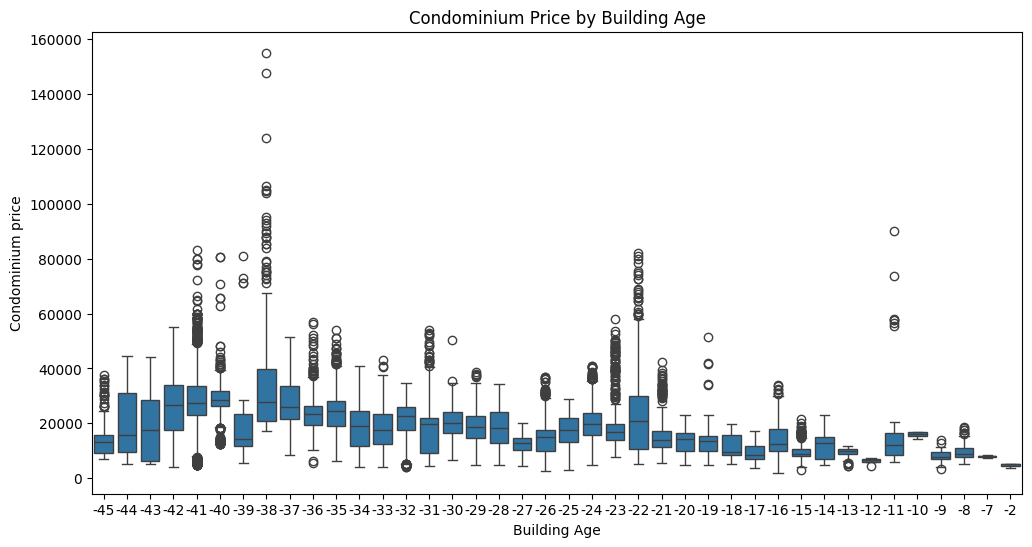

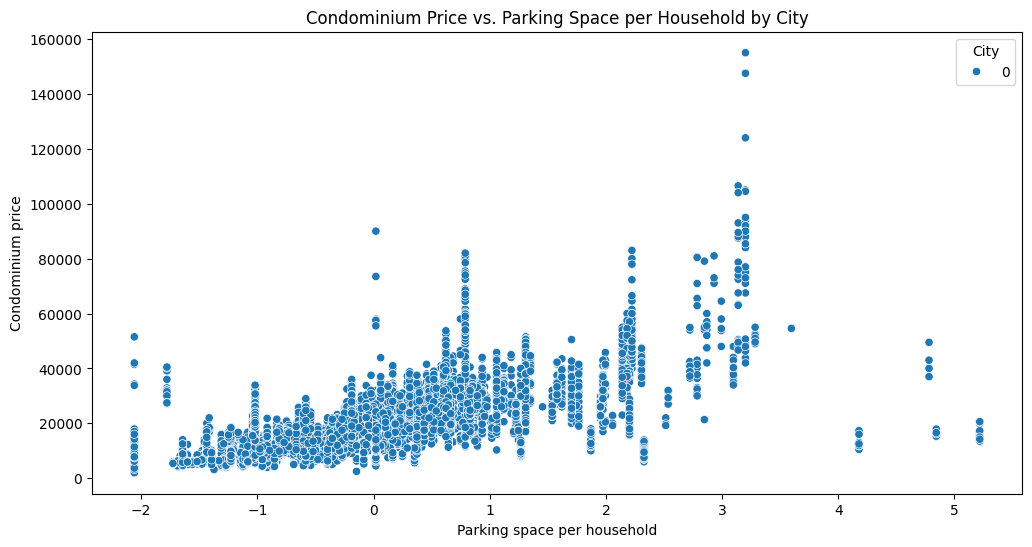

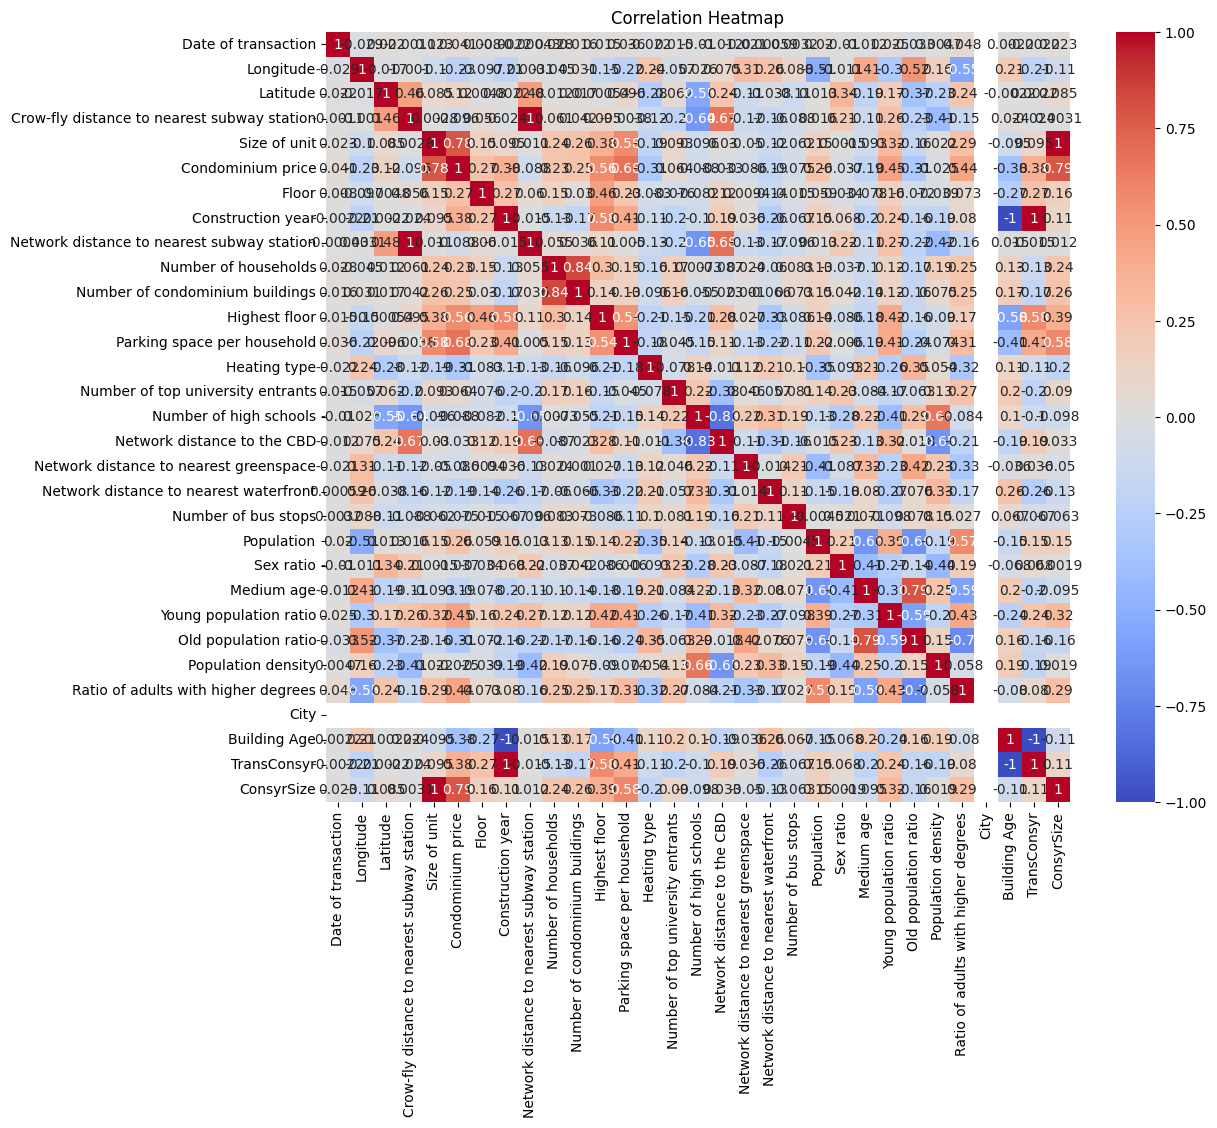

Training set shape: (13512, 6)
Validation set shape: (3379, 6)


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Convert 'Date of transaction' to datetime
train_df['Date of transaction'] = pd.to_datetime(train_df['Date of transaction'])
test_df['Date of transaction'] = pd.to_datetime(test_df['Date of transaction'])

# Create the new variables 'Building Age' and 'TransConsyr'
train_df['Building Age'] = train_df['Date of transaction'].dt.year - train_df['Construction year']
train_df['TransConsyr'] = train_df['Date of transaction'].dt.year * train_df['Construction year']
train_df['ConsyrSize'] = train_df['Size of unit'] * train_df['Construction year']

test_df['Building Age'] = test_df['Date of transaction'].dt.year - test_df['Construction year']
test_df['TransConsyr'] = test_df['Date of transaction'].dt.year * test_df['Construction year']
test_df['ConsyrSize'] = test_df['Size of unit'] * test_df['Construction year']


# Encode categorical variables
le = LabelEncoder()
train_df['City'] = le.fit_transform(train_df['City'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Crow-fly distance to nearest subway station', 'Network distance to nearest subway station', 'Parking space per household', 'Network distance to the CBD', 'Network distance to nearest greenspace', 'Network distance to nearest waterfront', 'Population', 'Ratio of adults with higher degrees']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Perform exploratory data analysis
print(train_df.describe())

# Visualize key features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Building Age', y='Condominium price', data=train_df)
plt.title('Condominium Price by Building Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Parking space per household', y='Condominium price', hue='City', data=train_df)
plt.title('Condominium Price vs. Parking Space per Household by City')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the data into features (X) and target variable (y)
X = train_df[['Floor', 'Parking space per household', 'Number of top university entrants',
              'Ratio of adults with higher degrees', 'Building Age', 'ConsyrSize']]
y = train_df['Condominium price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

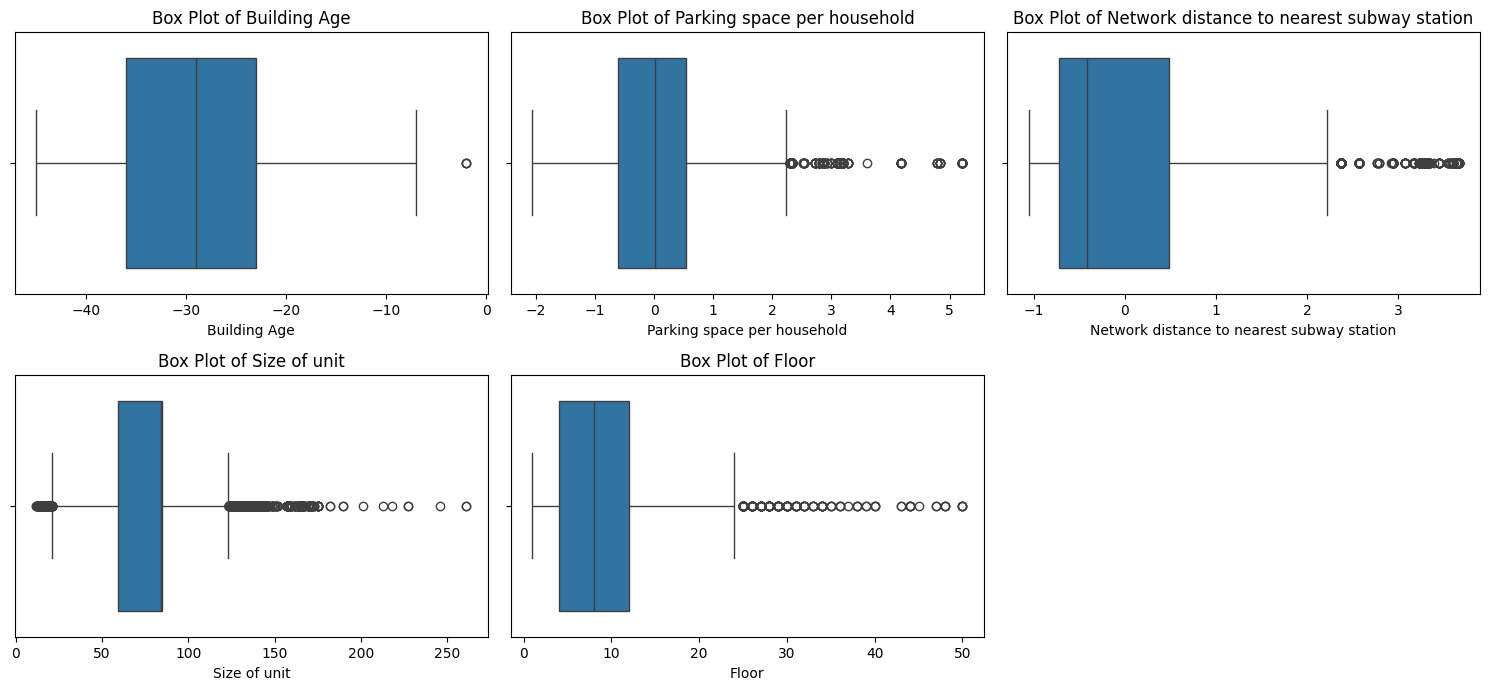


Outliers in 'Building Age':
       Building Age
6063             -2
9635             -2
16546            -2

Outliers in 'Parking space per household':
       Parking space per household
26                        2.328022
85                        3.138981
130                       4.178672
138                       2.307228
149                       3.201362
...                            ...
16423                     4.178672
16437                     3.201362
16551                     3.138981
16582                     2.328022
16864                     3.201362

[289 rows x 1 columns]

Outliers in 'Network distance to nearest subway station':
       Network distance to nearest subway station
44                                       3.253399
70                                       3.315519
77                                       3.170429
91                                       3.260186
92                                       2.374769
...                                         

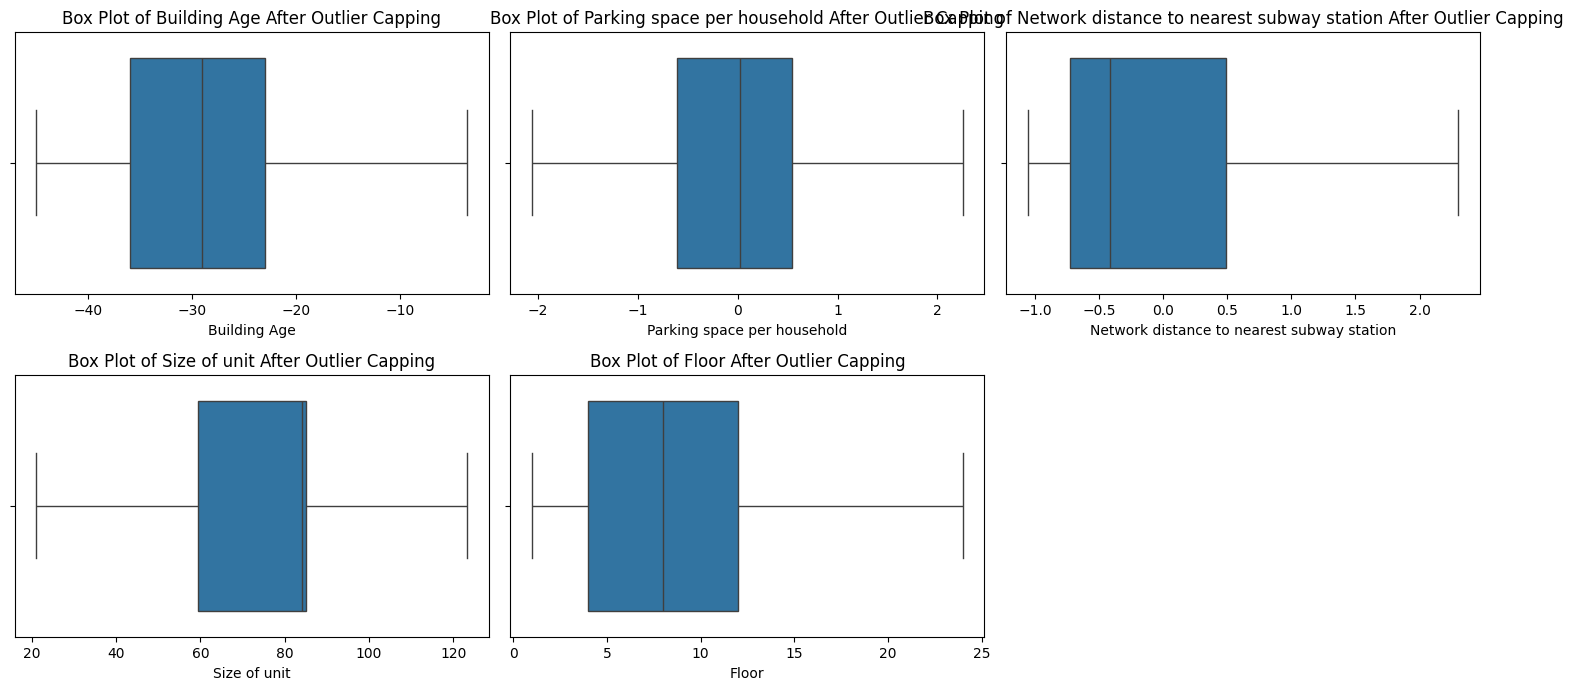

In [80]:
# Defining continuous columns to check for outliers
columns_to_check = ['Building Age', 'Parking space per household', 'Network distance to nearest subway station', 'Size of unit', 'Floor']

# Visualizing potential outliers using box plots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Identifying outliers based on the Interquartile Range (IQR) method
outliers = {}
for column in columns_to_check:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]

# Displaying summary of outliers for each column
for column, outlier_data in outliers.items():
    print(f"\nOutliers in '{column}':")
    print(outlier_data[[column]])

# Handling outliers: Option to replace with upper/lower bounds
# Justification: Capping extreme values is a conservative approach to mitigate the effects of outliers
# on future modeling without complete data loss.
for column in columns_to_check:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    train_df[column] = train_df[column].clip(lower=lower_bound, upper=upper_bound)


# Plotting the box plots again after handling outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train_df[column])
    plt.title(f'Box Plot of {column} After Outlier Capping')
plt.tight_layout()
plt.show()

Data Preparation and Variable Selection Rationale:

**1. Feature Engineering for Key Variables**
- Building Age, TransConsyr, ConsyrSize: Created as indicators of property age, transaction-construction interaction, and unit-size significance. These variables were derived based on their impact in prior regression models, where property age and construction factors showed strong explanatory power on price variability.
- Date of Transaction: Converted to datetime format to enable the derivation of Building Age, which directly influences housing value based on property age and potential depreciation.

**2. Variable Selection Based on Explanatory Power**
- Features like Parking space per household, Floor, Number of top university entrants, Ratio of adults with higher degrees were selected due to their high explanatory power in previous models. These attributes significantly affect housing prices by reflecting convenience (parking), location appeal (floor), educational quality, and resident profile.
- Network Distance to Amenities (CBD, subway, greenspace, waterfront): Although not directly used in the target model split, these attributes inform neighborhood desirability and indirectly guide feature prioritization in model refinement.

**3. Data Transformation**
- Label Encoding: Applied to City to convert categorical data to numerical form, aligning city-specific data with its influence on price differences.
- Standardization: Normalized numerical features (ex. network distances, population density) to ensure scale consistency, optimizing model performance by preventing scale-induced bias.

**4. Outlier Handling**
- Continuous variables like Building Age, Floor, and Network distances were analyzed for outliers using the IQR method and capped at upper and lower bounds. This approach conservatively controls the influence of extreme values without removing data, maintaining model robustness against outlier effects.

### Gradient Boosted Trees

In [81]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Prepare features and target variable
X = train_df[['Floor', 'Parking space per household', 'Network distance to nearest subway station', 'Building Age', 'ConsyrSize', 'Number of top university entrants', 'Population', 'Population density', 'Ratio of adults with higher degrees']]
y = train_df['Condominium price']

# Split the data into training and validation sets (80:20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages: 50 to 200
    'max_depth': [5, 10, 15],             # Maximum depth of individual trees: 5 to 15
    'learning_rate': [0.1],               # Learning rate
}

# Initialize the gradient boosting regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_gbr = grid_search.best_estimator_

# Make predictions on the training set and validation set
y_train_pred = best_gbr.predict(X_train)
y_val_pred = best_gbr.predict(X_val)

# Calculate R-squared and MAPE on the training set
rsq_train_gbr = r2_score(y_train, y_train_pred)
mape_train_gbr = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate R-squared and MAPE on the validation set
rsq_val_gbr = r2_score(y_val, y_val_pred)
mape_val_gbr = mean_absolute_percentage_error(y_val, y_val_pred)

# Report the results
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("\nGradient Boosting Tree Performance on Training Set:")
print(f"R-squared: {rsq_train_gbr}")
print(f"MAPE: {mape_train_gbr}\n")

print("Gradient Boosting Tree Performance on Validation Set:")
print(f"R-squared: {rsq_val_gbr}")
print(f"MAPE: {mape_val_gbr}")

Best Parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

Gradient Boosting Tree Performance on Training Set:
R-squared: 0.9953308284998079
MAPE: 0.025786666086981797

Gradient Boosting Tree Performance on Validation Set:
R-squared: 0.9833315551100159
MAPE: 0.04744852558481788


### APPLY on Test Set

In [82]:
# Already load and handle missing values in test data set

# Prepare test features (X_test) and target variable (y_test)
X_test = test_df[['Floor', 'Parking space per household', 'Network distance to nearest subway station', 'Building Age', 'ConsyrSize', 'Number of top university entrants', 'Population', 'Population density', 'Ratio of adults with higher degrees']]
y_test = test_df['Condominium price']

# Make predictions on the test set
y_test_pred = best_gbr.predict(X_test)

# Calculate R-squared and MAPE on the test set
rsq_test_gbr = r2_score(y_test, y_test_pred)
mape_test_gbr = mean_absolute_percentage_error(y_test, y_test_pred)

# Report the test results
print("\nGradient Boosting Tree Performance on Test Set:")
print(f"R-squared: {rsq_test_gbr}")
print(f"MAPE: {mape_test_gbr}")


Gradient Boosting Tree Performance on Test Set:
R-squared: 0.5239353782985826
MAPE: 0.2661355921535039


**Final Feature Selection Rationale**

1. Final Feature Selection
- The selected features (Floor, Parking space per household, Network distance to nearest subway station, Building Age, ConsyrSize, Number of top university entrants, Population, Population density, and Ratio of adults with higher degrees) were chosen after extensive evaluation through linear regression analysis, correlation assessment, and exploratory data analysis (EDA). Only the variables with the strongest impact on housing prices were retained, ensuring that the final selection was focused on high-explanatory power features relevant to price prediction. This selection captures essential property characteristics, accessibility, educational quality, and demographic factors critical to housing price determination.

2.	Handling Missing Values: Missing values were imputed before model training to ensure data completeness and maintain model reliability.

3.	Data Splitting: The data was divided into training and validation sets (80:20 split) to enable unbiased model evaluation and parameter tuning.

**Modeling and Parameter Tuning Choices**

1.	Parameter Tuning via Grid Search:
- The grid search focused on the most impactful hyperparameters for GBR:
- n_estimators was set between 50 and 200 to balance model complexity and performance.
- max_depth ranged from 5 to 15 to allow the model to capture meaningful interactions while controlling overfitting.
- learning_rate was fixed at 0.1 to strike a balance between convergence speed and generalization.
- This tuning identified the optimal parameters as learning_rate=0.1, max_depth=10, and n_estimators=100.

**Model Performance**

- Training Set: The GBR model achieved a high R-squared (0.9953) and low MAPE (0.0258), indicating a strong fit on the training data.
- Validation Set: With an R-squared of 0.9833 and MAPE of 0.0474, the model showed effective generalization on unseen validation data, suggesting minimal overfitting.
- Test Set:
1. R-squared: 0.5239
2. MAPE: 0.2661
3. The test results displayed a lower R-squared and higher MAPE compared to training and validation sets, which may reflect distributional differences or unaccounted factors in the test data. Nonetheless, the model delivers reasonable predictive accuracy considering the inherent variability in housing prices.

Test MAPE Report

MAPE on HousingPriceDaejeonTest.csv: 0.2661